In [1]:
import plotly
import plotly.plotly     as     py
import plotly.graph_objs as     go
import pandas            as     pd
import seaborn           as     sns
import matplotlib.pyplot as     plt
from   config            import plotly_id, plotly_key

plotly.tools.set_credentials_file(username=plotly_id, api_key=plotly_key)
sns.set(color_codes=True)

# The Olympic Games

In [2]:
games = pd.read_pickle('../dat/games.pkl')
games.head()

,Year,Season,Games,Host Country,NOC,Region,Athlete,Gender,Sport,Event,Medal
0,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Tennis,Tennis Men's Singles,NaN
1,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Tennis,Tennis Men's Doubles,Bronze
2,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Athletics,Athletics Men's 800 metres,Gold
3,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Athletics,"Athletics Men's 1,500 metres",Gold
4,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Athletics,Athletics Men's Marathon,NaN


In [3]:
medals = pd.read_pickle('../dat/medals.pkl')
medals.head()

,Year,Summer,Games,Host,NOC,Region,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
0,1896,1,1896 Summer,0,AUS,Australia,5,0,2,5,3,2,0,1
1,1896,1,1896 Summer,0,AUT,Austria,8,0,3,8,5,2,1,2
2,1896,1,1896 Summer,0,DEN,Denmark,15,0,5,12,6,1,2,3
3,1896,1,1896 Summer,0,FRA,France,26,0,6,18,11,5,4,2
4,1896,1,1896 Summer,0,GBR,UK,25,0,7,19,9,3,3,3


In [4]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Data columns (total 14 columns):
Year        3837 non-null int64
Summer      3837 non-null int64
Games       3837 non-null object
Host        3837 non-null int64
NOC         3837 non-null object
Region      3837 non-null object
Athletes    3837 non-null int64
Females     3837 non-null int64
Sports      3837 non-null int64
Events      3837 non-null int64
Medals      3837 non-null int64
Golds       3837 non-null int64
Silvers     3837 non-null int64
Bronzes     3837 non-null int64
dtypes: int64(11), object(3)
memory usage: 419.8+ KB


In [5]:
medals.describe()

,Year,Summer,Host,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
count,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000
mean,1981.898879,0.732343,0.013031,70.658327,19.421944,6.980975,29.816523,10.368256,3.485014,3.418296,3.464947
std,28.381436,0.442795,0.113422,117.075901,42.536103,6.380562,41.565980,30.349213,12.782128,10.293752,9.765239
min,1896.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1964.000000,0.000000,0.000000,7.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1988.000000,1.000000,0.000000,22.000000,3.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000
75%,2004.000000,1.000000,0.000000,80.000000,17.000000,10.000000,36.000000,6.000000,1.000000,1.000000,2.000000
max,2016.000000,1.000000,1.000000,1109.000000,369.000000,34.000000,270.000000,442.000000,187.000000,141.000000,126.000000


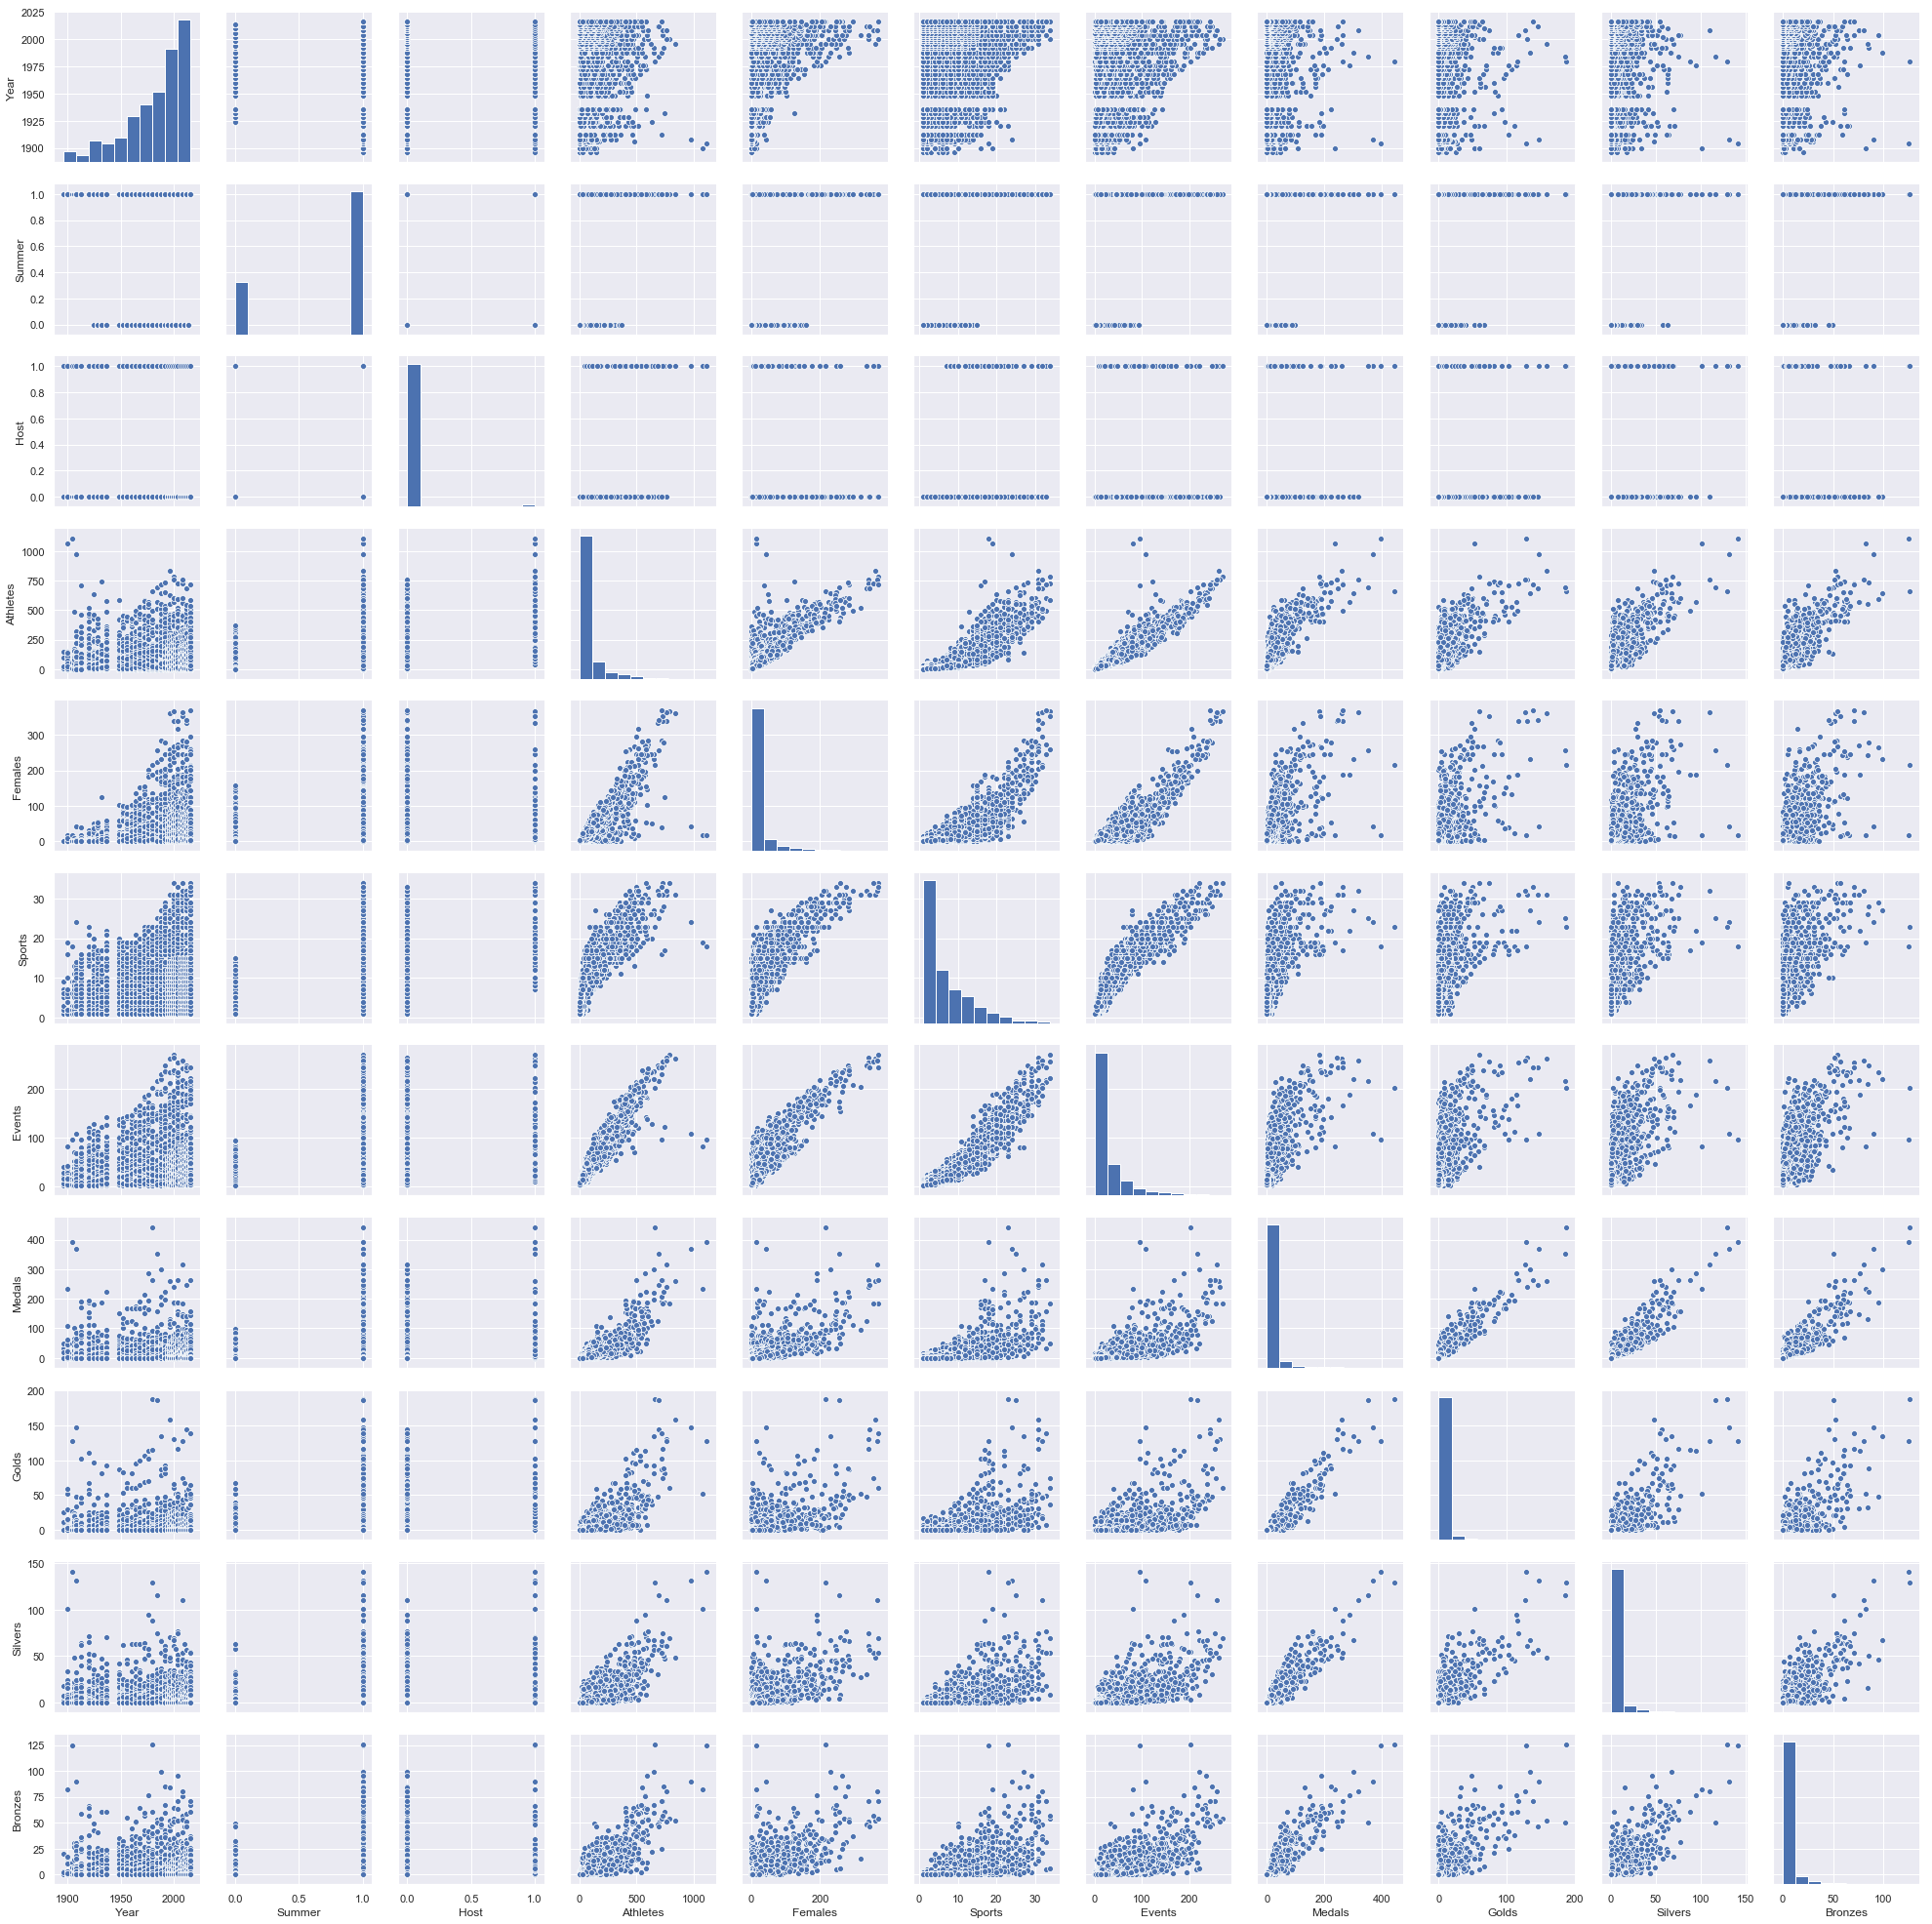

In [6]:
sns.pairplot(medals)
plt.show()

In [7]:
hover_text = []
color_range = []
for index, row in medals.iterrows():
    hover_text.append(('Games: {games}<br>'+
                       'Host: {host}<br>'+
                       'NOC: {noc}<br>'+
                       'Region: {region}<br>'+
                       'Athletes: {athletes}<br>'+
                       'Females: {females}<br>'+
                       'Sports: {sports}<br>'+
                       'Events: {events}<br>'+
                       'Medals: {medals}<br>'+
                       'Golds: {golds}<br>'+
                       'Silvers: {silvers}<br>'+
                       'Bronzes: {bronzes}').format(games    = row['Games'],
                                                    host     = row['Host'],
                                                    noc      = row['NOC'],
                                                    region   = row['Region'],
                                                    athletes = row['Athletes'],
                                                    females  = row['Females'],
                                                    sports   = row['Sports'],
                                                    events   = row['Events'],
                                                    medals   = row['Medals'],
                                                    golds    = row['Golds'],
                                                    silvers  = row['Silvers'],
                                                    bronzes  = row['Bronzes']))
    color_range.append(max(row['Medals'],100))

trace0 = go.Scatter(
    x      = medals['Athletes'],
    y      = medals['Events'],
    text   = hover_text,
    mode   = 'markers',
    marker = dict(
#        size          = medals['Athletes'],
        color         = color_range,
        showscale     = True,
        reversescale  = True,
        colorscale    = 'RdBu',
        colorbar      = dict(
                title = 'Total<br>Medals'
            )
    )
)

data      = [trace0]
layout    = go.Layout(
    title = 'Historic Medal Table of the Olympic Games',
    xaxis = dict(
        title         = 'Total Number of Athletes by Nation',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    yaxis = dict(
        title         = 'Total Number of Events by Nation',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor  = 'rgb(243, 243, 243)',
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'historic-olympic-medals')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [8]:
medals['Games'].unique()

array(['1896 Summer', '1900 Summer', '1904 Summer', '1906 Summer',
       '1908 Summer', '1912 Summer', '1920 Summer', '1924 Summer',
       '1924 Winter', '1928 Summer', '1928 Winter', '1932 Summer',
       '1932 Winter', '1936 Summer', '1936 Winter', '1948 Summer',
       '1948 Winter', '1952 Summer', '1952 Winter', '1956 Summer',
       '1956 Winter', '1960 Summer', '1960 Winter', '1964 Summer',
       '1964 Winter', '1968 Summer', '1968 Winter', '1972 Summer',
       '1972 Winter', '1976 Summer', '1976 Winter', '1980 Summer',
       '1980 Winter', '1984 Summer', '1984 Winter', '1988 Summer',
       '1988 Winter', '1992 Summer', '1992 Winter', '1994 Winter',
       '1996 Summer', '1998 Winter', '2000 Summer', '2002 Winter',
       '2004 Summer', '2006 Winter', '2008 Summer', '2010 Winter',
       '2012 Summer', '2014 Winter', '2016 Summer'], dtype=object)

In [9]:
summer = medals[medals['Summer'] == 1].groupby('Games').sum()
summer = summer.drop(['Year','Summer','Host'], axis=1)
summer = summer.reset_index()
summer = summer.merge(games[['Games','Season','Year']].drop_duplicates())

In [10]:
winter = medals[medals['Summer'] == 0].groupby('Games').sum()
winter = winter.drop(['Year','Summer','Host'], axis=1)
winter = winter.reset_index()
winter = winter.merge(games[['Games','Season','Year']].drop_duplicates())

In [11]:
summer_winter = pd.concat([summer,winter])
summer_winter = summer_winter.reset_index().drop('index', axis=1)
summer_winter

,Games,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes,Season,Year
0,1896 Summer,380,0,52,169,143,62,43,38,Summer,1896
1,1900 Summer,1936,33,129,401,604,201,228,175,Summer,1900
2,1904 Summer,1301,16,56,187,486,173,163,150,Summer,1904
3,1906 Summer,1733,11,120,531,458,157,156,145,Summer,1906
4,1908 Summer,3101,47,171,677,831,294,281,256,Summer,1908
5,1912 Summer,4040,87,217,932,941,326,315,300,Summer,1912
6,1920 Summer,4292,134,273,1212,1308,493,448,367,Summer,1920
7,1924 Summer,5233,244,384,1665,832,277,281,274,Summer,1924
8,1928 Summer,4992,404,362,1644,734,245,239,250,Summer,1928
9,1932 Summer,2969,347,238,992,647,229,214,204,Summer,1932


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

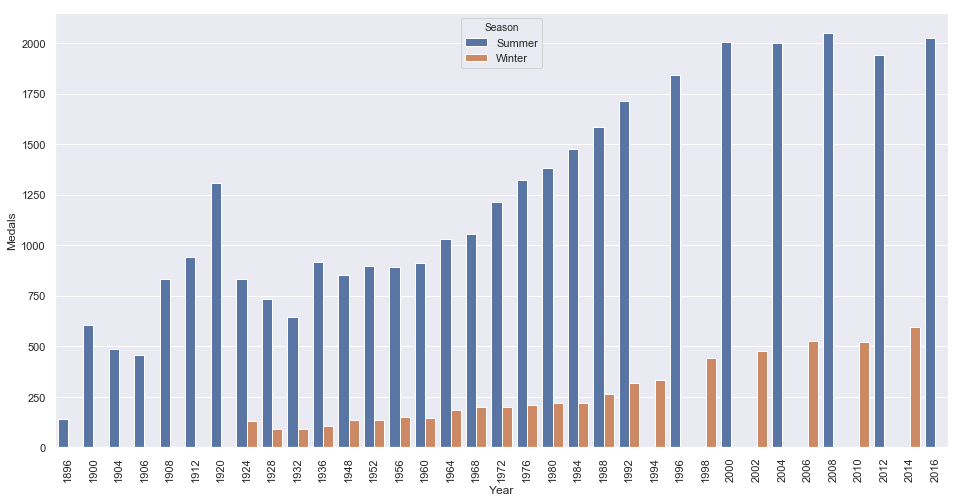

In [12]:
plt.figure("Summer and Winter Games", figsize=(16,8))
sns.barplot(x='Year', y='Medals', hue='Season', data=summer_winter)
plt.xticks(rotation=90)

# The Olympic Athletes

In [13]:
games['Summer']     = games['Season'] == 'Summer'
games['Female']     = games['Gender'] == 'F'
games['Gold']       = games['Medal']  == 'Gold'
games['Silver']     = games['Medal']  == 'Silver'
games['Bronze']     = games['Medal']  == 'Bronze'
games['Home Field'] = games['NOC']    == games['Host Country']
games.head()

,Year,Season,Games,Host Country,NOC,Region,Athlete,Gender,Sport,Event,Medal,Summer,Female,Gold,Silver,Bronze,Home Field
0,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Tennis,Tennis Men's Singles,NaN,True,False,False,False,False,False
1,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Tennis,Tennis Men's Doubles,Bronze,True,False,False,False,True,False
2,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Athletics,Athletics Men's 800 metres,Gold,True,False,True,False,False,False
3,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Athletics,"Athletics Men's 1,500 metres",Gold,True,False,True,False,False,False
4,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Athletics,Athletics Men's Marathon,NaN,True,False,False,False,False,False


In [14]:
# Total number of event contestants
games.shape

(271116, 17)

In [15]:
# Total number of unique athletes
unique_athletes = pd.DataFrame(
    games.groupby(['Athlete','Games','Region'])['Medal'].count())['Medal'].value_counts().sum()
print(unique_athletes)

# Distribution of number of medals won by an individual athlete
medal_distribution            = pd.DataFrame(pd.DataFrame(
    games.groupby(['Athlete','Games','Region'])['Medal'].count())['Medal'].value_counts())
medal_distribution.index.name = 'Medals Won at an Olympic Games'
medal_distribution            = medal_distribution.rename(columns={'Medal': 'Athletes'})

# Percent distribution of number of medals won by an individual athlete
medal_distribution['Percentage of Athletes'] = medal_distribution['Athletes']/unique_athletes * 100
medal_distribution['Percentage of Athletes'] = medal_distribution['Percentage of Athletes'].round(3)
medal_distribution

187318


,Athletes,Percentage of Athletes
Medals Won at an Olympic Games,,
0,152160,81.231
1,31710,16.928
2,2660,1.420
3,545,0.291
4,148,0.079
5,58,0.031
6,26,0.014
7,8,0.004
8,3,0.002


In [16]:
# Top athletes by number of medals won
athletes           = pd.DataFrame(games.groupby(['Athlete','Games','NOC','Region'])['Gold','Silver','Bronze'].sum())
athletes['Gold']   = athletes['Gold'].astype('int64')
athletes['Silver'] = athletes['Silver'].astype('int64')
athletes['Bronze'] = athletes['Bronze'].astype('int64')
athletes['Medals'] = athletes['Gold'] + athletes['Silver'] + athletes['Bronze']
athletes           = athletes.sort_values(by='Medals', ascending=False)
athletes           = athletes.reset_index()
athletes           = athletes.rename(columns={'Gold':    'Golds',
                                              'Silver':  'Silvers',
                                              'Bronze':  'Bronzes'})
athletes.head(20)

,Athlete,Games,NOC,Region,Golds,Silvers,Bronzes,Medals
0,Aleksandr Nikolayevich Dityatin,1980 Summer,URS,Russia,3,4,1,8
1,"Michael Fred Phelps, II",2008 Summer,USA,USA,8,0,0,8
2,"Michael Fred Phelps, II",2004 Summer,USA,USA,6,0,2,8
3,Mikhail Yakovlevich Voronin,1968 Summer,URS,Russia,2,4,1,7
4,Borys Anfiyanovych Shakhlin,1960 Summer,URS,Russia,4,2,1,7
5,Nikolay Yefimovich Andrianov,1976 Summer,URS,Russia,4,2,1,7
6,Mark Andrew Spitz,1972 Summer,USA,USA,7,0,0,7
7,"Matthew Nicholas ""Matt"" Biondi",1988 Summer,USA,USA,5,1,1,7
8,"Willis Augustus Lee, Jr.",1920 Summer,USA,USA,5,1,1,7
9,Mariya Kindrativna Horokhovska,1952 Summer,URS,Russia,2,5,0,7


# The Olympic Nations

In [17]:
# Total number of unique athletes
unique_teams = medals.shape[0]
print(unique_teams)

# Distribution of number of medals won by an individual team
team_distribution            = pd.DataFrame(medals['Medals'].value_counts())
team_distribution.index.name = 'Medals Won at an Olympic Games'
team_distribution            = team_distribution.rename(columns={'Medals': 'Teams'})

# Percent distribution of number of medals won by an individual team
team_distribution['Percentage of Teams'] = team_distribution['Teams']/unique_teams * 100
team_distribution['Percentage of Teams'] = team_distribution['Percentage of Teams'].round(3)

team_distribution.head(20)

3837


,Teams,Percentage of Teams
Medals Won at an Olympic Games,,
0,2180,56.815
1,268,6.985
2,155,4.040
3,116,3.023
5,66,1.720
4,66,1.720
6,58,1.512
7,52,1.355
8,42,1.095


In [18]:
# Top teams by number of medals won
teams           = medals.drop(['Year','Summer','Host','Females'], axis=1)
teams           = teams.merge(games[['Games','Host Country']].drop_duplicates(), how='left')
teams           = teams.sort_values(by='Medals', ascending=False)
teams           = teams.reset_index().drop(['index'], axis=1)
teams.head(20)

,Games,NOC,Region,Athletes,Sports,Events,Medals,Golds,Silvers,Bronzes,Host Country
0,1980 Summer,URS,Russia,660,23,202,442,187,129,126,URS
1,1904 Summer,USA,USA,1109,18,95,394,128,141,125,USA
2,1908 Summer,GBR,UK,972,24,108,368,147,131,90,GBR
3,1984 Summer,USA,USA,693,25,217,352,186,116,50,USA
4,2008 Summer,USA,USA,763,32,258,317,127,110,80,CHN
5,1988 Summer,URS,Russia,647,27,221,300,134,67,99,KOR
6,1976 Summer,URS,Russia,574,22,189,286,114,95,77,CAN
7,2016 Summer,USA,USA,719,33,245,264,139,54,71,BRA
8,1980 Summer,GDR,Germany,495,17,167,264,115,88,61,URS
9,2004 Summer,USA,USA,726,31,254,263,117,75,71,GRE


In [19]:
home         = medals[medals['Host'] == 1].groupby(['Games','Region']).sum()
home         = home.drop(['Year','Summer'], axis=1)
home         = home.reset_index()
home['Host'] = 'Host'

In [20]:
away         = medals[medals['Host'] == 0].groupby(['Games','Region']).sum()
away         = away.drop(['Year','Summer'], axis=1)
away         = away.reset_index()
away['Host'] = 'Guest'

In [21]:
home_away = pd.concat([home, away])
home_away = home_away.reset_index().drop('index', axis=1)
home_away

,Games,Region,Host,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes
0,1896 Summer,Greece,Host,148,0,9,39,48,10,18,20
1,1900 Summer,France,Host,1071,16,19,81,235,52,101,82
2,1904 Summer,USA,Host,1109,16,18,95,394,128,141,125
3,1906 Summer,Greece,Host,484,9,13,70,102,24,48,30
4,1908 Summer,UK,Host,972,42,24,108,368,147,131,90
5,1912 Summer,Sweden,Host,714,38,16,95,190,103,62,25
6,1920 Summer,Belgium,Host,518,18,23,121,188,57,65,66
7,1924 Summer,France,Host,636,50,20,128,110,37,51,22
8,1924 Winter,France,Host,68,3,9,16,10,0,0,10
9,1928 Summer,Netherlands,Host,384,55,17,103,57,20,29,8


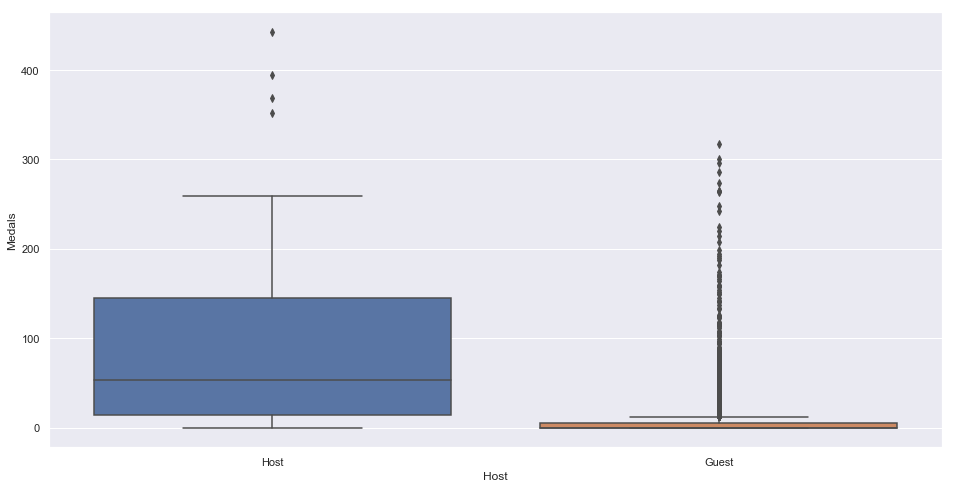

In [22]:
plt.figure("Home and Away Teams", figsize=(16,8))
sns.boxplot(x="Host", y="Medals", data=home_away)